In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from compare_paths import *
from utils import *
from pytorch_value_iteration_networks.model import *
from types import SimpleNamespace
from eval import *
import pickle


# VIN path compare

In [2]:

# Define the input map
n = 10  # size of the grid
config = "block"  # distribution of positive probability cells
num_blocks = 3  # number of positive region blocks
num_obstacles = 3  # number of obstacles
obstacle_type = "block"
square_size = 4  # size of the positive region square

# Discount factor
gamma = 0.8

# define experiment configuration
random_map = True


In [3]:
vin_weights = torch.load('/Users/nathankeplinger/Documents/Vanderbilt/Research/fullyObservableNavigation/model_weights/vin_full_traj.pth', weights_only=True)

config = SimpleNamespace(k = 16, 
                         l_i = 2,
                         l_q = 4,
                         l_h = 150,
                         imsize = 10,
                         batch_sz = 1
                         )

vin = VIN(config)
vin.load_state_dict(vin_weights)
vin.eval()

VIN(
  (h): Conv2d(2, 150, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (r): Conv2d(150, 1, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (q): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (fc): Linear(in_features=4, out_features=4, bias=False)
  (sm): Softmax(dim=1)
)

In [4]:

data = np.load("training_data/full_traj_vin_data.npz")

# Train data

images = data['arr_0']
S1 = data['arr_1']
S2 = data['arr_2']
labels = data['arr_3']


im_id = 42


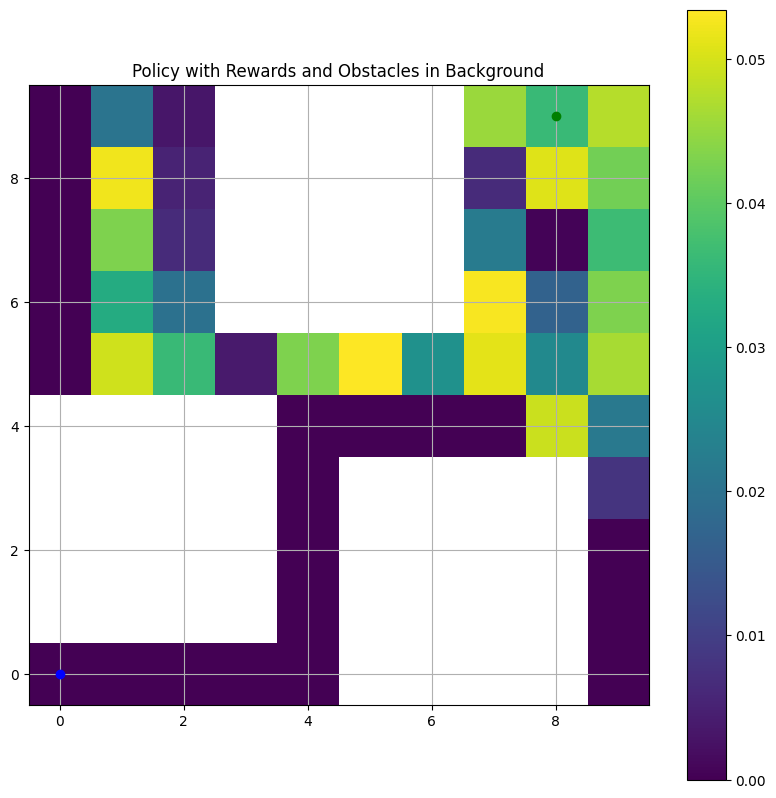

In [5]:
sample  = images[89]

reward = sample[0,:,:].copy()
obstacles = sample[1,:,:].copy()



obstacles = np.where(obstacles==1,True,False)

start,goal = pick_start_and_goal(reward,obstacles,70)
visualize_rewards(reward,obstacles,start,goal)

In [6]:


action_map = {(0, -1): 0, (1, 0): 1, (0, 1): 2, (-1, 0): 3}
inv_action_map = {v: k for k, v in action_map.items()}


agent_position = deepcopy(start)
while agent_position!=goal:
    # mark current position as 0 reward
    rewards[agent_position[0], agent_position[1]] = 0
    input = torch.Tensor(sample).unsqueeze(0)

    logits, _ = vin(input,torch.tensor(0),torch.tensor(0),16)
    pred = torch.argmax(logits).item()



    next_position = tuple(int(i) for i in policy[agent_position])
    print("Agent next state is {}".format(next_position))
    i, j = agent_position[0], agent_position[1]
    # visualize_rewards(rewards, obstacles_map, start, goal, agent_qposition, next_position)
    visualize_policy_and_rewards(rewards, obstacles_map, policy)
    agent_position = next_position






